In [1]:
import numpy as np
print("Numpy version: "+np.__version__)
from sklearn import __version__ as skver
print("Scikit-learn version: "+skver)
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC, NuSVC, OneClassSVM, SVR
%matplotlib inline
import matplotlib.pylab as plt
print("Matplotlib version: "+plt.__version__)

Numpy version: 1.13.1
Scikit-learn version: 0.19.0
Matplotlib version: 1.13.1


### Exclusive OR (XOR) classification problem

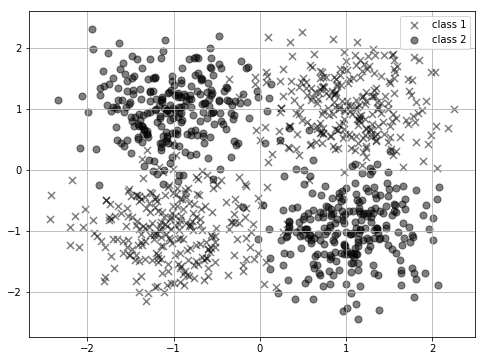

In [2]:
N = 1000  # number of samples
X, Y = make_blobs(n_samples=N, centers=[[1, 1], [-1, 1], [1, -1], [-1, -1]], cluster_std=0.5)
# Make it a two-class problem:
Y[Y==2] = 1.0
Y[Y==3] = 0.0 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', 
           s=50, alpha=0.5, label='class 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', 
           s=50, alpha=0.5, label='class 2')
plt.legend()
plt.grid()
# Simple train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, test_size=0.75)
# Create meshgrid for the probability plots
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

## C-SVM

- The XOR problem is not linearly separable, but we can find an hyperplane in a nonlinear space using kernels
    - The polynomial ('poly') kernel $k(x, z) = \left(\langle x, z \rangle + b \right)^d$
    - Try different values for  degree = {1, 2, 3} and coef0 = {0, 1}
    - The gaussian kernel ('rbf') $k(x, z) = \exp \left( -\gamma \| x- z \|_2^2 \right)$
    - Try different values for gamma = {0.1, 1.0, 10.0}
- What is C? Try C = {0.1, 100}

Area under the ROC curve (test): 0.990699
Area under the ROC curve (train): 0.995264
30 SVs for class 1
30 SVs for class 2


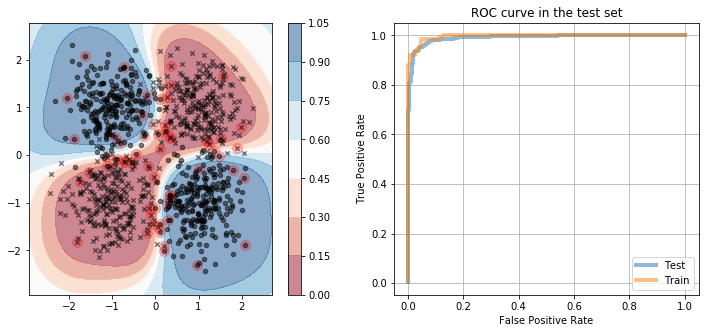

In [3]:
classifier = SVC(C=1.0, kernel='rbf', degree=3, coef0=1.0, gamma=1.0, probability=True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_test)

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
cr = ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
plt.colorbar(cr)
ax.scatter(X_train[classifier.support_, 0], X_train[classifier.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', 
           s=20, alpha=0.5, label='class 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', 
           s=20, alpha=0.5, label='class 2')

ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area under the ROC curve (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area under the ROC curve (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve in the test set')
plt.grid()
print("%d SVs for class 1" % (classifier.n_support_[0]))
print("%d SVs for class 2" % (classifier.n_support_[1]))

## $\nu$-SVM

- What is $\nu$ (nu)? Try $\nu$ = {0.1, 0.25, 0.5, 0.75}

Area under the ROC curve (test): 0.991861
Area under the ROC curve (train): 0.994368
34 SVs for class 1
32 SVs for class 2


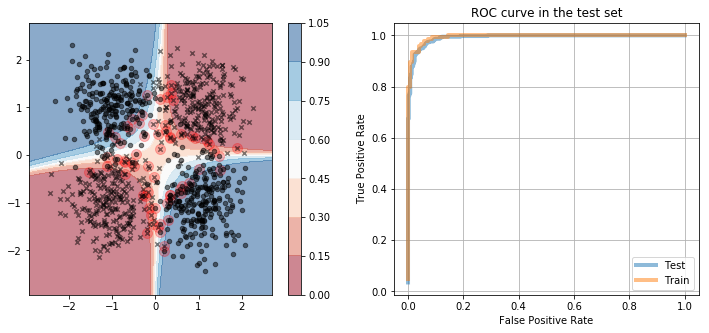

In [4]:
classifier = NuSVC(nu=0.25, kernel='poly', degree=3, coef0=1.0, gamma=1.0, probability=True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_test)

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
cr = ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
plt.colorbar(cr)
ax.scatter(X_train[classifier.support_, 0], X_train[classifier.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', 
           s=20, alpha=0.5, label='class 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', 
           s=20, alpha=0.5, label='class 2')

ax = fig.add_subplot(1, 2, 2)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area under the ROC curve (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area under the ROC curve (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve in the test set')
plt.grid()
print("%d SVs for class 1" % (classifier.n_support_[0]))
print("%d SVs for class 2" % (classifier.n_support_[1]))

## One-class SVM

- Does not use labels
- Estimates the distribution of the data
- Can be used to detect outliers 
- Outliers are samples that are "far" from the estimated distribution
- For this example:
    - We train with class Y==0 
    - We measure the distance of the samples to the hyperplane
    - Outliers have negative distances 

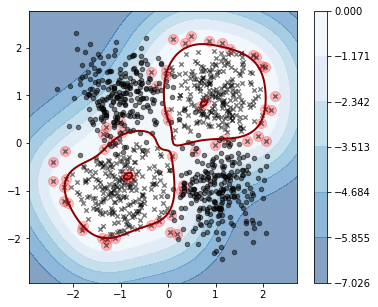

In [5]:
classifier = OneClassSVM(nu=0.1, kernel='rbf', gamma=1.0)
classifier.fit(X[Y==0])

fig = plt.figure(figsize=(6, 5))

ax = fig.add_subplot(1, 1, 1)
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
ax.contour(xx, yy, Z.reshape(xx.shape), levels=[0], linewidths=2, 
           colors='darkred', label='hyperplane')

cr = ax.contourf(xx, yy, Z.reshape(xx.shape), levels=np.linspace(Z.min(), 0, 7),
                 cmap=plt.cm.Blues_r, alpha=0.5)

plt.colorbar(cr)
ax.scatter(X[Y==0][classifier.support_, 0],X[Y==0][classifier.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', 
           s=20, alpha=0.5, label='class 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', 
           s=20, alpha=0.5, label='class 2')

## Support Vector Regression (SVR)

- It uses the $\epsilon$ insensitive loss
- Can also use kernels 
- Large $\gamma$ will overfit the noise, too small and the regressor will be too smooth, try $\gamma \in \{0.01, 0.1, 1, 10\}$ 

Squared error = 0.026679


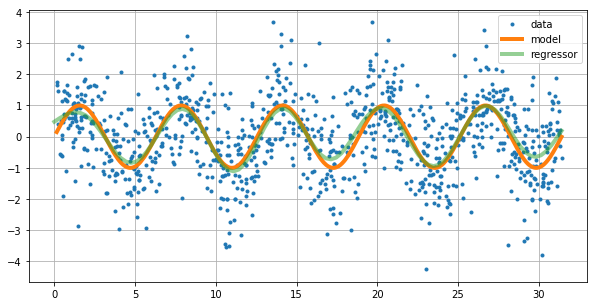

In [6]:
x = 10.0*np.pi*np.random.rand(1000)
x = np.sort(x)
y = np.sin(x)
y_noisy = y + np.random.randn(x.shape[0])
x_plot = np.linspace(0, 10.0*np.pi, 100)

svr = SVR(kernel='rbf', C=1.0, gamma=0.1)
svr.fit(x.reshape(-1, 1) , y_noisy)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y_noisy, '.', label='data')
plt.plot(x, y, '-', label='model', linewidth=4)
plt.plot(x_plot, svr.predict(x_plot.reshape(-1, 1)), '-', 
         linewidth=4, alpha=0.5, label='regressor')
plt.legend()
plt.grid()
mse_noisy = np.average((svr.predict(x.reshape(-1, 1)) - y_noisy)**2)
mse_clean = np.average((svr.predict(x.reshape(-1, 1)) - y)**2)
print("Squared error = %f" %(mse_clean))